In [1]:
import maup # mggg's library for proration, see documentation here: https://github.com/mggg/maup
import pandas as pd # standard python data library
import geopandas as gp # the geo-version of pandas
import numpy as np 
import os
import fiona
from statistics import mean, median
from pandas import read_csv
gp.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw' #To load KML files

# VEST Florida Validation

<Projected CRS: EPSG:2236>
Name: NAD83 / Florida East (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Florida - SPCS - E
- bounds: (-82.33, 24.41, -79.97, 30.83)
Coordinate Operation:
- name: SPCS83 Florida East zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

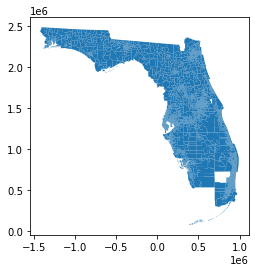

In [123]:
vest_fl_16 = gp.read_file("./raw-from-source/VEST/fl_2016/fl_2016.shp")
vest_fl_16.plot()
vest_fl_16.crs

## Documentation

### Races

G16PRERTru - Donald J. Trump (Republican Party)  
G16PREDCli - Hillary Clinton (Democratic Party)  
G16PRELJoh - Gary Johnson (Libertarian Party)  
G16PRECCas - Darrell L. Castle (Constitution Party)  
G16PREGSte - Jill Stein (Green Party)  
G16PREIDeL - Roque De La Fuente (Reform Party)  
G16PREOth - Write-in Votes  

G16USSRRub - Marco Rubio (Republican Party)  
G16USSDMur - Patrick Murphy (Democratic Party)  
G16USSLSta - Paul Stanton (Libertarian Party)  
G16USSOth - Independent and Write-in Votes  

### Election Source

Election results from Florida Division of Elections (http://dos.myflorida.com/elections/data-statistics/elections-data/precinct-level-election-results/)  

### Precinct Source

The starting point was the Orlando Sentinel's precinct map for the 2016 presidential primary (http://interactive.orlandosentinel.com/elections/2016/presidential-primary/results/dem.html).  

Hillsborough, Lake, Miami-Dade, Orange, Palm Beach, and Pinellas Counties were updated directly with shapefiles downloaded from county Supervisor of Elections websites.  

Brevard, Marion, and Putnam Counties were updated with KML files from the respective county Supervisor of Elections websites, from their election result map pages.  

Columbia, DeSoto, Leon, Polk, and Osceola Counties updates received from Supervisor of Elections websites through personal contact.  

Highlands, Santa Rosa, Sarasota, and Volusia Counties had some precinct mergers, which were determined based on visual inspection of PDF precinct maps from the county websites.  

Charlotte, Hendry, Holmes, Jackson, Jefferson, Levy, Madison, and Walton Counties are from VTDs released by the Census Bureau's Redistricting Data Program.  

Hernando 99, Collier 450, and Palm Beach 8001/8002 are UOCAVA precincts with no real geography and votes were not redistributed.  

Precinct names were adjusted to align with the formatting used in the voter registration file (e.g., some precincts have leading spaces).  

In [3]:
#This Data is from the FL department of state, and can only be downloaded county by county
all_files = os.listdir("./raw-from-source/Election_Results/precinctlevelelectionresults2016gen")

In [4]:
#Check that all files have the same number of columns
for i in all_files:
    ref = "./raw-from-source/Election_Results/precinctlevelelectionresults2016gen/"
    file_ref = ref+i
    print(i)
    file_prev = pd.read_csv(file_ref,sep="\t",engine='python',index_col=None, header=None, error_bad_lines=False)
    print(file_prev.shape)
    
#All the files have 19 columns, so they should be good to combine

SEM_PctResults20161108.txt
(8154, 19)
STJ_PctResults20161108.txt
(4276, 19)
BAK_PctResults20161108.txt
(909, 19)
SAN_PctResults20161108.txt
(3415, 19)
MRN_PctResults20161108.txt
(12201, 19)
DIX_PctResults20161108.txt
(858, 19)
JEF_PctResults20161108.txt
(1206, 19)
PAS_PctResults20161108.txt
(13784, 19)
DES_PctResults20161108.txt
(1414, 19)
TAY_PctResults20161108.txt
(1111, 19)
GIL_PctResults20161108.txt
(709, 19)
SUW_PctResults20161108.txt
(1556, 19)
GAD_PctResults20161108.txt
(2584, 19)
HER_PctResults20161108.txt


Skipping line 28: '	' expected after '"'
Skipping line 106: '	' expected after '"'
Skipping line 185: '	' expected after '"'
Skipping line 263: '	' expected after '"'
Skipping line 346: '	' expected after '"'
Skipping line 429: '	' expected after '"'
Skipping line 510: '	' expected after '"'
Skipping line 587: '	' expected after '"'
Skipping line 662: '	' expected after '"'
Skipping line 741: '	' expected after '"'
Skipping line 829: '	' expected after '"'
Skipping line 916: '	' expected after '"'
Skipping line 994: '	' expected after '"'
Skipping line 1076: '	' expected after '"'


(3037, 19)
MON_PctResults20161108.txt
(3168, 19)
WAK_PctResults20161108.txt
(929, 19)
JAC_PctResults20161108.txt
(1230, 19)
OSC_PctResults20161108.txt
(9550, 19)
POL_PctResults20161108.txt
(21010, 19)
WAL_PctResults20161108.txt
(1722, 19)
HOL_PctResults20161108.txt
(898, 19)
HAR_PctResults20161108.txt
(1392, 19)
STL_PctResults20161108.txt
(6331, 19)
LEV_PctResults20161108.txt
(1001, 19)
CAL_PctResults20161108.txt
(898, 19)
ALA_PctResults20161108.txt
(6478, 19)
VOL_PctResults20161108.txt
(11871, 19)
DAD_PctResults20161108.txt
(69874, 19)
HIL_PctResults20161108.txt
(45890, 19)
CHA_PctResults20161108.txt
(7195, 19)
WAS_PctResults20161108.txt
(1664, 19)
ESC_PctResults20161108.txt
(8067, 19)
ORA_PctResults20161108.txt
(32989, 19)
CLA_PctResults20161108.txt
(4275, 19)
GLA_PctResults20161108.txt
(1044, 19)
HAM_PctResults20161108.txt
(755, 19)
LIB_PctResults20161108.txt
(856, 19)
SUM_PctResults20161108.txt
(2379, 19)
HEN_PctResults20161108.txt
(1158, 19)
CLL_PctResults20161108.txt
(7814, 19)
P

Skipping line 70: '	' expected after '"'
Skipping line 173: '	' expected after '"'
Skipping line 330: '	' expected after '"'
Skipping line 431: '	' expected after '"'
Skipping line 518: '	' expected after '"'
Skipping line 617: '	' expected after '"'
Skipping line 708: '	' expected after '"'
Skipping line 814: '	' expected after '"'
Skipping line 916: '	' expected after '"'
Skipping line 1014: '	' expected after '"'
Skipping line 1111: '	' expected after '"'
Skipping line 1210: '	' expected after '"'
Skipping line 1317: '	' expected after '"'
Skipping line 1421: '	' expected after '"'
Skipping line 1523: '	' expected after '"'
Skipping line 1628: '	' expected after '"'
Skipping line 1736: '	' expected after '"'
Skipping line 1831: '	' expected after '"'
Skipping line 1933: '	' expected after '"'
Skipping line 2025: '	' expected after '"'
Skipping line 2121: '	' expected after '"'
Skipping line 2218: '	' expected after '"'
Skipping line 2318: '	' expected after '"'
Skipping line 2422: '

Skipping line 21272: '	' expected after '"'
Skipping line 21361: '	' expected after '"'
Skipping line 21443: '	' expected after '"'
Skipping line 21527: '	' expected after '"'
Skipping line 21618: '	' expected after '"'
Skipping line 21712: '	' expected after '"'
Skipping line 21805: '	' expected after '"'
Skipping line 21894: '	' expected after '"'
Skipping line 21983: '	' expected after '"'
Skipping line 22073: '	' expected after '"'
Skipping line 22169: '	' expected after '"'
Skipping line 22257: '	' expected after '"'
Skipping line 22350: '	' expected after '"'
Skipping line 22446: '	' expected after '"'
Skipping line 22494: '	' expected after '"'
Skipping line 22565: '	' expected after '"'
Skipping line 22640: '	' expected after '"'
Skipping line 22726: '	' expected after '"'
Skipping line 22814: '	' expected after '"'
Skipping line 22906: '	' expected after '"'
Skipping line 22994: '	' expected after '"'
Skipping line 23080: '	' expected after '"'
Skipping line 23175: '	' expecte

Skipping line 45396: '	' expected after '"'
Skipping line 45493: '	' expected after '"'
Skipping line 45586: '	' expected after '"'
Skipping line 45726: '	' expected after '"'
Skipping line 45727: '	' expected after '"'
Skipping line 45855: '	' expected after '"'
Skipping line 45950: '	' expected after '"'
Skipping line 46041: '	' expected after '"'
Skipping line 46131: '	' expected after '"'
Skipping line 46225: '	' expected after '"'
Skipping line 46326: '	' expected after '"'
Skipping line 46411: '	' expected after '"'
Skipping line 46504: '	' expected after '"'
Skipping line 46602: '	' expected after '"'
Skipping line 46696: '	' expected after '"'
Skipping line 46790: '	' expected after '"'
Skipping line 46885: '	' expected after '"'
Skipping line 46971: '	' expected after '"'
Skipping line 47065: '	' expected after '"'
Skipping line 47163: '	' expected after '"'
Skipping line 47243: '	' expected after '"'
Skipping line 47328: '	' expected after '"'
Skipping line 47422: '	' expecte

Skipping line 69715: '	' expected after '"'
Skipping line 69797: '	' expected after '"'
Skipping line 69885: '	' expected after '"'
Skipping line 69959: '	' expected after '"'
Skipping line 70046: '	' expected after '"'
Skipping line 70132: '	' expected after '"'
Skipping line 70208: '	' expected after '"'
Skipping line 70279: '	' expected after '"'
Skipping line 70365: '	' expected after '"'
Skipping line 70460: '	' expected after '"'
Skipping line 70556: '	' expected after '"'
Skipping line 70645: '	' expected after '"'


(69962, 19)
OKA_PctResults20161108.txt
(4488, 19)
SAR_PctResults20161108.txt
(15496, 19)
CIT_PctResults20161108.txt
(2802, 19)
BRE_PctResults20161108.txt
(15505, 19)
BRO_PctResults20161108.txt
(69707, 19)
PIN_PctResults20161108.txt
(33620, 19)
MAD_PctResults20161108.txt
(1060, 19)
GUL_PctResults20161108.txt
(792, 19)
HIG_PctResults20161108.txt
(2856, 19)
MAN_PctResults20161108.txt
(7783, 19)
IND_PctResults20161108.txt
(6549, 19)


In [5]:
#Create a dataframe with the txt files
li = []
for i in all_files:
    ref = "./raw-from-source/Election_Results/precinctlevelelectionresults2016gen/"
    file_ref = ref+i
    file_prev = pd.read_csv(file_ref,sep="\t",engine='python',index_col=None, header=None,error_bad_lines=False)
    li.append(file_prev)
frame = pd.concat(li, axis=0, ignore_index=True)
print(frame.shape)

Skipping line 28: '	' expected after '"'
Skipping line 106: '	' expected after '"'
Skipping line 185: '	' expected after '"'
Skipping line 263: '	' expected after '"'
Skipping line 346: '	' expected after '"'
Skipping line 429: '	' expected after '"'
Skipping line 510: '	' expected after '"'
Skipping line 587: '	' expected after '"'
Skipping line 662: '	' expected after '"'
Skipping line 741: '	' expected after '"'
Skipping line 829: '	' expected after '"'
Skipping line 916: '	' expected after '"'
Skipping line 994: '	' expected after '"'
Skipping line 1076: '	' expected after '"'
Skipping line 70: '	' expected after '"'
Skipping line 173: '	' expected after '"'
Skipping line 330: '	' expected after '"'
Skipping line 431: '	' expected after '"'
Skipping line 518: '	' expected after '"'
Skipping line 617: '	' expected after '"'
Skipping line 708: '	' expected after '"'
Skipping line 814: '	' expected after '"'
Skipping line 916: '	' expected after '"'
Skipping line 1014: '	' expected af

Skipping line 21712: '	' expected after '"'
Skipping line 21805: '	' expected after '"'
Skipping line 21894: '	' expected after '"'
Skipping line 21983: '	' expected after '"'
Skipping line 22073: '	' expected after '"'
Skipping line 22169: '	' expected after '"'
Skipping line 22257: '	' expected after '"'
Skipping line 22350: '	' expected after '"'
Skipping line 22446: '	' expected after '"'
Skipping line 22494: '	' expected after '"'
Skipping line 22565: '	' expected after '"'
Skipping line 22640: '	' expected after '"'
Skipping line 22726: '	' expected after '"'
Skipping line 22814: '	' expected after '"'
Skipping line 22906: '	' expected after '"'
Skipping line 22994: '	' expected after '"'
Skipping line 23080: '	' expected after '"'
Skipping line 23175: '	' expected after '"'
Skipping line 23273: '	' expected after '"'
Skipping line 23364: '	' expected after '"'
Skipping line 23458: '	' expected after '"'
Skipping line 23529: '	' expected after '"'
Skipping line 23603: '	' expecte

Skipping line 48786: '	' expected after '"'
Skipping line 48900: '	' expected after '"'
Skipping line 48961: '	' expected after '"'
Skipping line 48962: '	' expected after '"'
Skipping line 49040: '	' expected after '"'
Skipping line 49185: '	' expected after '"'
Skipping line 49186: '	' expected after '"'
Skipping line 49301: '	' expected after '"'
Skipping line 49422: '	' expected after '"'
Skipping line 49423: '	' expected after '"'
Skipping line 49589: '	' expected after '"'
Skipping line 49675: '	' expected after '"'
Skipping line 49763: '	' expected after '"'
Skipping line 49855: '	' expected after '"'
Skipping line 49951: '	' expected after '"'
Skipping line 50048: '	' expected after '"'
Skipping line 50140: '	' expected after '"'
Skipping line 50236: '	' expected after '"'
Skipping line 50332: '	' expected after '"'
Skipping line 50428: '	' expected after '"'
Skipping line 50517: '	' expected after '"'
Skipping line 50608: '	' expected after '"'
Skipping line 50702: '	' expecte

Skipping line 68616: '	' expected after '"'
Skipping line 68707: '	' expected after '"'
Skipping line 68800: '	' expected after '"'
Skipping line 68883: '	' expected after '"'
Skipping line 68972: '	' expected after '"'
Skipping line 69049: '	' expected after '"'
Skipping line 69138: '	' expected after '"'
Skipping line 69233: '	' expected after '"'
Skipping line 69328: '	' expected after '"'
Skipping line 69390: '	' expected after '"'
Skipping line 69467: '	' expected after '"'
Skipping line 69560: '	' expected after '"'
Skipping line 69649: '	' expected after '"'
Skipping line 69715: '	' expected after '"'
Skipping line 69797: '	' expected after '"'
Skipping line 69885: '	' expected after '"'
Skipping line 69959: '	' expected after '"'
Skipping line 70046: '	' expected after '"'
Skipping line 70132: '	' expected after '"'
Skipping line 70208: '	' expected after '"'
Skipping line 70279: '	' expected after '"'
Skipping line 70365: '	' expected after '"'
Skipping line 70460: '	' expecte

(626229, 19)


In [6]:
frame.columns = frame.iloc[395275]
frame.drop([395275],inplace=True)
frame.reset_index(inplace=True,drop=True)
print(frame["CountyCode"].unique())
print(frame.shape)

['SEM' 'STJ' 'BAK' 'SAN' 'MRN' 'DIX' 'JEF' 'PAS' 'DES' 'TAY' 'GIL' 'SUW'
 'GAD' 'HER' 'MON' 'WAK' 'JAC' 'OSC' 'POL' 'WAL' 'HOL' 'HAR' 'STL' 'LEV'
 'CAL' 'ALA' 'VOL' 'DAD' 'HIL' 'CHA' 'WAS' 'ESC' 'ORA' 'CLA' 'GLA' 'HAM'
 'LIB' 'SUM' 'HEN' 'CLL' 'PUT' 'MRT' 'OKE' 'LEE' 'NAS' 'FLA' 'LEO' 'LAK'
 'CLM' 'DUV' 'BRA' 'UNI' 'FRA' 'BAY' 'LAF' 'IND' 'PAL' 'OKA' 'SAR' 'CIT'
 'BRE' 'BRO' 'PIN' 'MAD' 'GUL' 'HIG' 'MAN']
(626228, 19)


In [7]:
#Filter down to the relevant races
frame["ContestName"]=frame["ContestName"].str.upper()
office_List = ['PRESIDENT OF THE UNITED STATES','UNITED STATES SENATOR','President of the United States','United States Senator']
bad_name_List = ['OverVotes','UnderVotes','Times Blank Voted','Times Over Voted']
filtered_frame=frame[(frame["ContestName"].isin(office_List)) & ~(frame["CanName"].isin(bad_name_List))]
cand_name_dict = {"Trump / Pence":"Donald J. Trump","Clinton / Kaine":"Hillary R. Clinton",
                 "Johnson / Weld":"Gary Johnson","Stein / Baraka":"Jill Stein",
                 "Write-in":"WriteIn","De La Fuente / Steinberg":"Roque De La Fuente",
                 "Castle / Bradley":"Darrell L. Castle",'WriteInVotes':'WriteIn','WriteinVotes':'WriteIn'}
 
filtered_frame["CanName"]=filtered_frame["CanName"].map(cand_name_dict).fillna(filtered_frame["CanName"])
print(filtered_frame["CountyCode"].unique())

['SEM' 'STJ' 'BAK' 'SAN' 'MRN' 'DIX' 'JEF' 'PAS' 'DES' 'TAY' 'GIL' 'SUW'
 'GAD' 'HER' 'MON' 'WAK' 'JAC' 'OSC' 'POL' 'WAL' 'HOL' 'HAR' 'STL' 'LEV'
 'CAL' 'ALA' 'VOL' 'DAD' 'HIL' 'CHA' 'WAS' 'ESC' 'ORA' 'CLA' 'GLA' 'HAM'
 'LIB' 'SUM' 'HEN' 'CLL' 'PUT' 'MRT' 'OKE' 'LEE' 'NAS' 'FLA' 'LEO' 'LAK'
 'CLM' 'DUV' 'BRA' 'UNI' 'FRA' 'BAY' 'LAF' 'PAL' 'OKA' 'SAR' 'CIT' 'BRE'
 'BRO' 'PIN' 'MAD' 'GUL' 'HIG' 'MAN' 'IND']


<ipython-input-7-420cbeb3f689>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_frame["CanName"]=filtered_frame["CanName"].map(cand_name_dict).fillna(filtered_frame["CanName"])


In [8]:
#Make the precinct column at least 4 digits
filtered_frame["modified_pre"]=filtered_frame["Precinct"].astype(str).str.zfill(5) 


#Make a column with the 3 letter county code and the precincts
filtered_frame["Pct_std"]=filtered_frame["CountyCode"]+filtered_frame["modified_pre"]
print(filtered_frame.shape)

(85817, 21)


<ipython-input-8-4c9b250c6c14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_frame["modified_pre"]=filtered_frame["Precinct"].astype(str).str.zfill(5)
<ipython-input-8-4c9b250c6c14>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_frame["Pct_std"]=filtered_frame["CountyCode"]+filtered_frame["modified_pre"]


In [9]:
print(filtered_frame["Pct_std"].str[0:3].unique())

['SEM' 'STJ' 'BAK' 'SAN' 'MRN' 'DIX' 'JEF' 'PAS' 'DES' 'TAY' 'GIL' 'SUW'
 'GAD' 'HER' 'MON' 'WAK' 'JAC' 'OSC' 'POL' 'WAL' 'HOL' 'HAR' 'STL' 'LEV'
 'CAL' 'ALA' 'VOL' 'DAD' 'HIL' 'CHA' 'WAS' 'ESC' 'ORA' 'CLA' 'GLA' 'HAM'
 'LIB' 'SUM' 'HEN' 'CLL' 'PUT' 'MRT' 'OKE' 'LEE' 'NAS' 'FLA' 'LEO' 'LAK'
 'CLM' 'DUV' 'BRA' 'UNI' 'FRA' 'BAY' 'LAF' 'PAL' 'OKA' 'SAR' 'CIT' 'BRE'
 'BRO' 'PIN' 'MAD' 'GUL' 'HIG' 'MAN' 'IND']


In [10]:
filtered_frame["CanName"]= filtered_frame["CanName"].str.upper()
filtered_frame["ContestName"] = filtered_frame["ContestName"].str.upper()
filtered_frame["pivot_col"]=filtered_frame["CanName"]+filtered_frame["ContestName"]

<ipython-input-10-385d14c6895e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_frame["CanName"]= filtered_frame["CanName"].str.upper()
<ipython-input-10-385d14c6895e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_frame["ContestName"] = filtered_frame["ContestName"].str.upper()
<ipython-input-10-385d14c6895e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [11]:
pivoted_2016 = pd.pivot_table(filtered_frame, values=["CanVotes"], index=["Pct_std"],columns=["pivot_col"],aggfunc=sum)
pivoted_2016.columns = pivoted_2016.columns.droplevel(0)
pivoted_2016.reset_index(drop=False,inplace=True)
pivoted_2016.shape
print(len(pivoted_2016.columns))
print(pivoted_2016.columns)

16
Index(['Pct_std', 'BASIL E. DALACKUNITED STATES SENATOR',
       'BRUCE NATHANUNITED STATES SENATOR',
       'DARRELL L. CASTLEPRESIDENT OF THE UNITED STATES',
       'DONALD J. TRUMPPRESIDENT OF THE UNITED STATES',
       'GARY JOHNSONPRESIDENT OF THE UNITED STATES',
       'HILLARY R. CLINTONPRESIDENT OF THE UNITED STATES',
       'JILL STEINPRESIDENT OF THE UNITED STATES',
       'MARCO RUBIOUNITED STATES SENATOR',
       'PATRICK MURPHYUNITED STATES SENATOR',
       'PAUL STANTONUNITED STATES SENATOR',
       'ROQUE DE LA FUENTEPRESIDENT OF THE UNITED STATES',
       'STEVEN MACHATUNITED STATES SENATOR',
       'TONY KHOURYUNITED STATES SENATOR',
       'WRITEINPRESIDENT OF THE UNITED STATES',
       'WRITEINUNITED STATES SENATOR'],
      dtype='object', name='pivot_col')


In [12]:
pivoted_2016['Pct_std'].str[0:3].unique()

array(['ALA', 'BAK', 'BAY', 'BRA', 'BRE', 'BRO', 'CAL', 'CHA', 'CIT',
       'CLA', 'CLL', 'CLM', 'DAD', 'DES', 'DIX', 'DUV', 'ESC', 'FLA',
       'FRA', 'GAD', 'GIL', 'GLA', 'GUL', 'HAM', 'HAR', 'HEN', 'HER',
       'HIG', 'HIL', 'HOL', 'IND', 'JAC', 'JEF', 'LAF', 'LAK', 'LEE',
       'LEO', 'LEV', 'LIB', 'MAD', 'MAN', 'MON', 'MRN', 'MRT', 'NAS',
       'OKA', 'OKE', 'ORA', 'OSC', 'PAL', 'PAS', 'PIN', 'POL', 'PUT',
       'SAN', 'SAR', 'SEM', 'STJ', 'STL', 'SUM', 'SUW', 'TAY', 'UNI',
       'VOL', 'WAK', 'WAL', 'WAS'], dtype=object)

In [13]:
pivoted_2016.columns=(['countypct',"sen_wi_1",
                       "sen_wi_2",
                       "G16PRECCas",
                       "G16PRERTru",
                       "G16PRELJon",
                        "G16PREDCli",
                       "G16PREGSte",
                       "G16USSRRub",
                       "G16USSDMur",
                       "G16USSLSta",
                       "G16PREIDeL",
                       "sen_wi_3",
                       "sen_wi_4",  
                       "G16PREoth",
                       "sen_wi_5"])
print(pivoted_2016.columns)
print(pivoted_2016.shape)
pivoted_2016["G16USSOth"]=pivoted_2016["sen_wi_1"]+pivoted_2016["sen_wi_2"]+pivoted_2016["sen_wi_3"]+pivoted_2016["sen_wi_4"]+pivoted_2016["sen_wi_5"]
pivoted_2016.drop(["sen_wi_1","sen_wi_2","sen_wi_3","sen_wi_4","sen_wi_5"], axis=1,inplace=True)

Index(['countypct', 'sen_wi_1', 'sen_wi_2', 'G16PRECCas', 'G16PRERTru',
       'G16PRELJon', 'G16PREDCli', 'G16PREGSte', 'G16USSRRub', 'G16USSDMur',
       'G16USSLSta', 'G16PREIDeL', 'sen_wi_3', 'sen_wi_4', 'G16PREoth',
       'sen_wi_5'],
      dtype='object')
(5870, 16)


In [14]:
pivoted_2016 = pivoted_2016.fillna(0)
print(sum(pivoted_2016["G16PREDCli"]))
pivoted_2016["county"]=pivoted_2016["countypct"].str[0:3]

4508731.0


In [15]:
print(sum(vest_fl_16["G16PREDCli"]))

4504158


In [16]:
vest_fl_16.groupby(["county"]).sum()

,G16PRERTru,G16PREDCli,G16PRELJon,G16PRECCas,G16PREGSte,G16PREIDeL,G16PREoth,G16USSRRub,G16USSDMur,G16USSLSta,G16USSOth
county,,,,,,,,,,,
ALA,46834,75820,4059,262,1507,87,1531,54203,69399,2294,1642
BAK,10294,2112,169,23,30,6,71,9901,2135,232,218
BAY,62194,21797,2652,179,562,65,773,62906,19971,2484,1498
BRA,8913,2924,177,33,47,4,60,8720,2694,232,235
BRE,181848,119679,9451,744,2708,314,3397,181496,112914,9709,7882
...,...,...,...,...,...,...,...,...,...,...,...
UNI,4568,1014,90,7,12,3,28,4313,1064,106,106
VOL,143007,109091,6111,440,2003,208,2418,139933,104531,7395,5257
WAK,10512,4348,378,32,66,14,94,9773,4852,330,256


In [17]:
pd.set_option('display.max_rows', 70)
display(pivoted_2016.groupby(["county"]).sum()["G16PREDCli"]-vest_fl_16.groupby(["county"]).sum()["G16PREDCli"])

county
ALA       0.0
BAK       0.0
BAY       0.0
BRA       0.0
BRE       0.0
BRO       0.0
CAL       0.0
CHA       0.0
CIT       0.0
CLA       0.0
CLL      72.0
CLM       0.0
DAD       0.0
DES       0.0
DIX       0.0
DUV       0.0
ESC       0.0
FLA       9.0
FRA       0.0
GAD       0.0
GIL       0.0
GLA       0.0
GUL       0.0
HAM       0.0
HAR       0.0
HEN       0.0
HER       0.0
HIG       0.0
HIL       0.0
HOL       0.0
IND       0.0
JAC       0.0
JEF       0.0
LAF       0.0
LAK       5.0
LEE       0.0
LEO       0.0
LEV       0.0
LIB       0.0
MAD       0.0
MAN       0.0
MON       0.0
MRN       0.0
MRT       0.0
NAS       0.0
OKA       0.0
OKE       0.0
ORA       0.0
OSC      52.0
PAL    4435.0
PAS       0.0
PIN       0.0
POL       0.0
PUT       0.0
SAN       0.0
SAR       0.0
SEM       0.0
STJ       0.0
STL       0.0
SUM       0.0
SUW       0.0
TAY       0.0
UNI       0.0
VOL       0.0
WAK       0.0
WAL       0.0
WAS       0.0
Name: G16PREDCli, dtype: float64

In [18]:
print(vest_fl_16.head())
print(pivoted_2016.head())

   pct county countypct  G16PRERTru  G16PREDCli  G16PRELJon  G16PRECCas  \
0  001    DAD    DAD001         277         195           4           0   
1  010    DAD    DAD010          20          16           0           0   
2  100    DAD    DAD100         641        2893          66          17   
3  101    DAD    DAD101         679        1096          34           0   
4  102    DAD    DAD102        1100        1596          29           1   

   G16PREGSte  G16PREIDeL  G16PREoth  G16USSRRub  G16USSDMur  G16USSLSta  \
0           2           0          5         337         133           3   
1           0           0          0          30           6           0   
2          41          16         24         897        2434          50   
3           7           0         18         845         947          14   
4           4           2         22        1399        1274          16   

   G16USSOth                                           geometry  
0          5  POLYGON Z ((

In [19]:
print(pivoted_2016.columns)

Index(['countypct', 'G16PRECCas', 'G16PRERTru', 'G16PRELJon', 'G16PREDCli',
       'G16PREGSte', 'G16USSRRub', 'G16USSDMur', 'G16USSLSta', 'G16PREIDeL',
       'G16PREoth', 'G16USSOth', 'county'],
      dtype='object')


In [20]:
vest_fl_16["countypct"] = vest_fl_16["county"]+vest_fl_16["pct"].str.zfill(5)
print(vest_fl_16.head())

   pct county countypct  G16PRERTru  G16PREDCli  G16PRELJon  G16PRECCas  \
0  001    DAD  DAD00001         277         195           4           0   
1  010    DAD  DAD00010          20          16           0           0   
2  100    DAD  DAD00100         641        2893          66          17   
3  101    DAD  DAD00101         679        1096          34           0   
4  102    DAD  DAD00102        1100        1596          29           1   

   G16PREGSte  G16PREIDeL  G16PREoth  G16USSRRub  G16USSDMur  G16USSLSta  \
0           2           0          5         337         133           3   
1           0           0          0          30           6           0   
2          41          16         24         897        2434          50   
3           7           0         18         845         947          14   
4           4           2         22        1399        1274          16   

   G16USSOth                                           geometry  
0          5  POLYGON Z ((

In [21]:
source_precinct_election_changes_dict = {"WAS00014":"WAS00017","WAS00016":"WAS00019","HAR00017":"HAR00009","HAR00015":"HAR00007",
    "PUT00031":"PUT00035","HAR00018":"HAR00010"}

pivoted_2016["countypct"]=pivoted_2016["countypct"].map(source_precinct_election_changes_dict).fillna(pivoted_2016["countypct"])


In [22]:
#Deal with 0 votes precincts
vest_empty = vest_fl_16[(vest_fl_16['G16PRERTru']==0) & (vest_fl_16['G16PREDCli']==0) &
              (vest_fl_16['G16PRELJon']==0) & (vest_fl_16['G16PRECCas']==0) &
              (vest_fl_16['G16PREGSte']==0) & (vest_fl_16['G16PREIDeL']==0) &
              (vest_fl_16['G16PREoth']==0) & (vest_fl_16['G16USSRRub']==0) &
              (vest_fl_16['G16USSDMur']==0) & (vest_fl_16['G16USSLSta']==0) &
              (vest_fl_16['G16USSOth']==0)]

#Create the zero vote precincts in the MEDSL file

new_precincts = pd.DataFrame(columns=pivoted_2016.columns)
new_precincts["countypct"]=vest_empty["countypct"]
new_precincts["county"]=vest_empty["countypct"].str[0:3]

col_list = ['G16PRECCas', 'G16PRERTru', 'G16PRELJon', 'G16PREDCli',
       'G16PREGSte', 'G16USSRRub', 'G16USSDMur', 'G16USSLSta', 'G16PREIDeL',
       'G16PREoth', 'G16USSOth']
for i in col_list:
    new_precincts[i]=0

print(new_precincts.head())

pivoted_2016= pivoted_2016.append(new_precincts)
pivoted_2016.reset_index(drop=True,inplace=True)
print(pivoted_2016.head())

    countypct  G16PRECCas  G16PRERTru  G16PRELJon  G16PREDCli  G16PREGSte  \
273  DAD00383           0           0           0           0           0   
281  DAD00391           0           0           0           0           0   
282  DAD00392           0           0           0           0           0   
283  DAD00394           0           0           0           0           0   
284  DAD00395           0           0           0           0           0   

     G16USSRRub  G16USSDMur  G16USSLSta  G16PREIDeL  G16PREoth  G16USSOth  \
273           0           0           0           0          0          0   
281           0           0           0           0          0          0   
282           0           0           0           0          0          0   
283           0           0           0           0          0          0   
284           0           0           0           0          0          0   

    county  
273    DAD  
281    DAD  
282    DAD  
283    DAD  
284    DA

In [23]:
check_election = pd.merge(vest_fl_16,pivoted_2016,how="outer",on="countypct",indicator=True)

print(check_election["_merge"].value_counts())
check_election[check_election["_merge"]=="left_only"].to_csv("./vest_election.csv")
check_election[check_election["_merge"]=="right_only"].to_csv("./source_election.csv")

both          5983
right_only      23
left_only       17
Name: _merge, dtype: int64


In [24]:
merge these precincts:
UNI0001A
UNI0001B
UNI0002A
UNI0002B
UNI0003A
UNI0003B
UNI0004A
UNI0004C
UNI0005A
UNI0005C

call them this:
UNI1A & 1B
UNI2A & 2B
UNI3A & 3B
UNI4A & 4C
UNI5A & 5C   


election_precinct_merger(["UNI0001A","UNI0001B"],"UNI1A & 1B")
election_precinct_merger(["UNI0002A","UNI0002B"],"UNI2A & 2B")
election_precinct_merger(["UNI0003A","UNI0003B"],"UNI3A & 3B")
election_precinct_merger(["UNI0004A","UNI0004C"],"UNI4A & 4C")
election_precinct_merger(["UNI0005A","UNI0005C"],"UNI5A & 5C")

SyntaxError: invalid syntax (<ipython-input-24-1a8d5de1004a>, line 1)

In [25]:
print(check_election[check_election["_merge"]=="both"])

      pct county_x countypct  G16PRERTru_x  G16PREDCli_x  G16PRELJon_x  \
0     001      DAD  DAD00001         277.0         195.0           4.0   
1     010      DAD  DAD00010          20.0          16.0           0.0   
2     100      DAD  DAD00100         641.0        2893.0          66.0   
3     101      DAD  DAD00101         679.0        1096.0          34.0   
4     102      DAD  DAD00102        1100.0        1596.0          29.0   
...   ...      ...       ...           ...           ...           ...   
5995    4      HOL  HOL00004        1077.0         105.0          24.0   
5996    5      HOL  HOL00005         390.0          30.0           6.0   
5997    6      HOL  HOL00006        1667.0         126.0          26.0   
5998    7      HOL  HOL00007        1307.0         180.0          26.0   
5999    8      HOL  HOL00008         835.0         151.0          18.0   

      G16PRECCas_x  G16PREGSte_x  G16PREIDeL_x  G16PREoth_x  ...  \
0              0.0           2.0           

In [26]:
print(sum(vest_fl_16["G16USSOth"]))
print(sum(pivoted_2016["G16USSOth"]))

168360
155700.0


In [27]:
print(pivoted_2016.columns)
print(vest_fl_16.columns)

Index(['countypct', 'G16PRECCas', 'G16PRERTru', 'G16PRELJon', 'G16PREDCli',
       'G16PREGSte', 'G16USSRRub', 'G16USSDMur', 'G16USSLSta', 'G16PREIDeL',
       'G16PREoth', 'G16USSOth', 'county'],
      dtype='object')
Index(['pct', 'county', 'countypct', 'G16PRERTru', 'G16PREDCli', 'G16PRELJon',
       'G16PRECCas', 'G16PREGSte', 'G16PREIDeL', 'G16PREoth', 'G16USSRRub',
       'G16USSDMur', 'G16USSLSta', 'G16USSOth', 'geometry'],
      dtype='object')


In [28]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff != 0):
                print(df.iloc[j]['countypct'])
                print(i)
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]['countypct'])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    print("New max diff is: ", str(max_diff))
                    print(df.iloc[j]['countypct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]['countypct'])
        else:
            matching_rows +=1
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 5")
    diff_list.sort()
    print(diff_list)

col_list = ['G16PRECCas', 'G16PRERTru', 'G16PRELJon', 'G16PREDCli',
       'G16PREGSte', 'G16USSRRub', 'G16USSDMur', 'G16USSLSta', 'G16PREIDeL']

#Took out Senate other and president other

validater_row(check_election[check_election["_merge"]=="both"],col_list)

SAR00429
G16PRERTru
New max diff is:  683.0
SAR00429
SAR00429
G16PRELJon
SAR00429
G16PREDCli
SAR00429
G16PREGSte
SAR00429
G16USSRRub
New max diff is:  729.0
SAR00429
SAR00429
G16USSDMur
SAR00429
G16USSLSta
SAR00501
G16PRERTru
New max diff is:  1603.0
SAR00501
SAR00501
G16PRELJon
SAR00501
G16PREDCli
SAR00501
G16PREGSte
SAR00501
G16USSRRub
New max diff is:  1622.0
SAR00501
SAR00501
G16USSDMur
SAR00501
G16USSLSta
SAR00501
G16PREIDeL
PUT00021
G16PRECCas
PUT00021
G16PRERTru
PUT00021
G16PRELJon
PUT00021
G16PREDCli
PUT00021
G16PREGSte
PUT00021
G16USSRRub
PUT00021
G16USSDMur
PUT00021
G16USSLSta
PUT00021
G16PREIDeL
PUT00020
G16PRERTru
PUT00020
G16PRELJon
PUT00020
G16PREDCli
PUT00020
G16PREGSte
PUT00020
G16USSRRub
PUT00020
G16USSDMur
PUT00020
G16USSLSta
PUT00020
G16PREIDeL
PUT00018
G16PRECCas
PUT00018
G16PRERTru
PUT00018
G16PRELJon
PUT00018
G16PREDCli
PUT00018
G16PREGSte
PUT00018
G16USSRRub
PUT00018
G16USSDMur
PUT00018
G16USSLSta
PUT00018
G16PREIDeL
PUT00019
G16PRECCas
PUT00019
G16PRERTru
PUT000

In [29]:
diff_list = ['HAR00005', 'HAR00008', 'HAR00011', 'HAR00012', 'PAL01173', 'PAL01189', 'PAL01247', 'PAL02081', 'PAL02083', 'PAL02097', 'PAL02116', 'PAL02126', 'PAL04129', 'PAL05003', 'PAL05007', 'PAL05018', 'PAL05055', 'PAL05112', 'PAL05113', 'PAL05115', 'PAL05117', 'PAL05119', 'PAL06207', 'PAL07149', 'PUT00014', 'PUT00015', 'PUT00016', 'PUT00018', 'PUT00019', 'PUT00020', 'PUT00021', 'PUT00022', 'PUT00023', 'PUT00024', 'PUT00025', 'PUT00026', 'PUT00027', 'PUT00028', 'PUT00030', 'PUT00032', 'PUT00033', 'PUT00036', 'PUT00037', 'SAR00429', 'SAR00501', 'WAL00430', 'WAL00440', 'WAL00540', 'WAS00015']

In [30]:
print(check_election[check_election["_merge"]=="left_only"]["countypct"])

922     UNI0001A
923     UNI0001B
924     UNI0002A
925     UNI0002B
926     UNI0003A
927     UNI0003B
929     UNI0004A
931     UNI0004C
932     UNI0005A
934     UNI0005C
1089    PUT00034
1098    PUT00038
1109    PUT00039
5123    HAR00003
5124    HAR00004
5126    HAR00006
5771    WAS00018
Name: countypct, dtype: object


In [31]:
pd.set_option('display.max_columns', 500)
display(check_election[check_election["countypct"]=='WAL00420'])

,pct,county_x,countypct,G16PRERTru_x,G16PREDCli_x,G16PRELJon_x,G16PRECCas_x,G16PREGSte_x,G16PREIDeL_x,G16PREoth_x,G16USSRRub_x,G16USSDMur_x,G16USSLSta_x,G16USSOth_x,geometry,G16PRECCas_y,G16PRERTru_y,G16PRELJon_y,G16PREDCli_y,G16PREGSte_y,G16USSRRub_y,G16USSDMur_y,G16USSLSta_y,G16PREIDeL_y,G16PREoth_y,G16USSOth_y,county_y,_merge
5979,420,WAL,WAL00420,381.0,68.0,10.0,0.0,1.0,0.0,0.0,379.0,53.0,8.0,11.0,"POLYGON Z ((-1012400.981 2271653.512 0.000, -1...",0.0,381.0,10.0,68.0,1.0,379.0,53.0,8.0,0.0,0.0,0.0,WAL,both


In [32]:
print(len(vest_fl_16["county"].unique()))

67


### Shapefiles

The starting point was the Orlando Sentinel's precinct map for the 2016 presidential primary (http://interactive.orlandosentinel.com/elections/2016/presidential-primary/results/dem.html).  

Hillsborough, Lake, Miami-Dade, Orange, Palm Beach, and Pinellas Counties were updated directly with shapefiles downloaded from county Supervisor of Elections websites.  

Brevard, Marion, and Putnam Counties were updated with KML files from the respective county Supervisor of Elections websites, from their election result map pages.  

Columbia, DeSoto, Leon, Polk, and Osceola Counties updates received from Supervisor of Elections websites through personal contact.  

Highlands, Santa Rosa, Sarasota, and Volusia Counties had some precinct mergers, which were determined based on visual inspection of PDF precinct maps from the county websites.  

Charlotte, Hendry, Holmes, Jackson, Jefferson, Levy, Madison, and Walton Counties are from VTDs released by the Census Bureau's Redistricting Data Program.  

Hernando 99, Collier 450, and Palm Beach 8001/8002 are UOCAVA precincts with no real geography and votes were not redistributed.  

Precinct names were adjusted to align with the formatting used in the voter registration file (e.g., some precincts have leading spaces).  

#The below had shapefiles, but they were not able to load:
DAD,HIG,LAK,LEE,PAL,PIN,SUM

#Multiple files for BAY, CLL, SUM, SUW, VOL

For some of these files, I either exported a XlS file to csv to make it easier to load or 

In [125]:
GAD_pct=pd.read_csv("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/GAD/deleted_columns_PctBlock.csv",error_bad_lines=False)
#print(GAD_pct.head())

GIL_pct=pd.read_csv("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/GIL/GIL20121106v6_PctBlock.txt",sep="\t", header=None)
GIL_pct.reset_index(inplace=True,drop=True)
GIL_pct = GIL_pct[[0,1,2]]
GIL_pct.columns = ['County','Precinct','Block']
#print(GIL_pct.head())

HAM_pct=pd.read_csv("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/HAM/HAM20140707_PctBlocka8ac771f-a98a-4718-bb62-f6dceab1369c.txt",sep="\t", header=None)
HAM_pct.reset_index(inplace=True,drop=True)
HAM_pct = HAM_pct[[0,1,2]]
HAM_pct.columns = ['County','Precinct','Block']
#print(HAM_pct.head())

JAC_pct=pd.read_csv("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/JAC/cleaned_PctBlock.csv")
JAC_pct.columns = ['County','Precinct','Block']
JAC_pct["County"]="JAC"
#print(JAC_pct.head())

MAD_pct=pd.read_csv("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/MAD/clean_PctBlock.csv")
MAD_pct.columns = ['County','Precinct','Block']
#print(MAD_pct.head())

MRN_pct=pd.read_csv("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/MRN/MRN20160510PctBlocka03accb3-5931-4025-b0b3-ee84b1d78dce.txt",sep="\t", header=None)
MRN_pct.columns = ['County','Precinct','Block']
#print(MRN_pct.head())

TAY_pct=pd.read_csv("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/TAY/TAY20120806_PctBlock0b8117f6-c1de-4b3f-8c25-1e78e2013cd7.txt",sep="\t", header=None)
TAY_pct.columns = ['County','Precinct','Block']
#print(TAY_pct.head())

DAD_pct=pd.read_csv("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/DAD/DAD20150817_PctBlock8708ddd9-66e2-42f4-8249-d4aa549f0d92.txt",sep="\t")
DAD_pct=DAD_pct[["COUNTY CODE","PRECINCT NUMBER","CENSUS BLOCK"]]
DAD_pct.columns = ['County','Precinct','Block']
#print(DAD_pct.head())

HIG_pct=pd.read_csv("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/HIG/HIG20160801_PctBlock2b83ba25-1180-477a-b954-b31f1605fd92.txt",sep="\t")
HIG_pct=HIG_pct[["County Code","Precinct Number","Census Block"]]
HIG_pct.columns = ['County','Precinct','Block']
HIG_pct["County"]="HIG"
#print(HIG_pct.head())

LAK_pct=pd.read_csv("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/LAK/LAK20160420_PctBlock73e1ca5e-e9f7-48e1-b380-98b8401ad0f0.txt",sep="\t")
LAK_pct=LAK_pct[["County Code","Precinct Number","Census Block"]]
LAK_pct.columns = ['County','Precinct','Block']
LAK_pct["County"]="LAK"
#print(LAK_pct.head())

LEE_pct=pd.read_csv("/Users/peterhorton/Documents/Redistricting_Data_Hub/Coding/pdv/pdv-fl/vest-fl-2016/raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/LEE/LEE20180813_PctBlock495f9750-05d2-4aa6-9b20-72a6a1fcef02.txt",sep="\t",header=None)
LEE_pct["County"]="LEE"
LEE_pct = LEE_pct[[1,2,'County']]
LEE_pct.columns = ['Precinct','Block','County']
LEE_pct = LEE_pct[['County','Precinct','Block']]
#print(LEE_pct.head())

PIN_pct=pd.read_csv("/Users/peterhorton/Documents/Redistricting_Data_Hub/Coding/pdv/pdv-fl/vest-fl-2016/raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/PIN/PIN20160503PCTBLOCK6239b364-d072-49e8-a23f-5162bcb5e8f7.TXT",sep=",")
PIN_pct["County"]="PIN"
PIN_pct.columns = ['Block','Precinct','County']
PIN_pct = PIN_pct[['County','Precinct','Block']]
#print(PIN_pct.head())

SUM_pct=pd.read_csv("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/SUM/SUM20150414_PctBlock5aacc620-010f-48b7-b03e-074bc85a3d2a.txt",sep='\t')
SUM_pct = SUM_pct[['County Code','PrecinctNu','CensusBloc']]
SUM_pct.columns = ['County','Precinct','Block']
SUM_pct["County"]="SUM"
#print(SUM_pct.head())

In [126]:
block_file_list = [GAD_pct,GIL_pct,HAM_pct,JAC_pct,MAD_pct,MRN_pct,TAY_pct,DAD_pct,HIG_pct,LAK_pct,LEE_pct,PIN_pct,SUM_pct]
block_counties = pd.concat(block_file_list)
block_counties["unique_ID"]=block_counties["County"]+block_counties["Precinct"].astype(str)


In [127]:
#Shapefiles built out of block assignments
fl_2010_census_blocks = gp.read_file("./raw-from-source/Census_Blocks/fl_2010_b_bound/fl_2010_b_bound.shp")
print(fl_2010_census_blocks.crs)

epsg:4269


In [128]:
fl_2010_census_blocks.rename(columns={"GEOID": "Block"},inplace=True)
fl_2010_census_blocks["Block"] = fl_2010_census_blocks["Block"].astype(int)
fl_2010_census_blocks = fl_2010_census_blocks[["Block","geometry"]]
block_counties_merge = pd.merge(block_counties,fl_2010_census_blocks,on="Block",how="left")
block_counties_merge=gp.GeoDataFrame(block_counties_merge)
census_block_precincts = block_counties_merge.dissolve(by="unique_ID")

In [129]:
census_block_precincts.reset_index(inplace=True,drop=True)
print(census_block_precincts.head())

                                            geometry County Precinct  \
0  POLYGON ((-80.11869 25.95714, -80.11992 25.957...    DAD        1   
1  POLYGON ((-80.13581 25.87200, -80.13810 25.871...    DAD       10   
2  POLYGON ((-80.35118 25.80440, -80.35095 25.804...    DAD      100   
3  POLYGON ((-80.15749 25.96307, -80.15965 25.963...    DAD      101   
4  POLYGON ((-80.14698 25.95983, -80.14705 25.961...    DAD      102   

             Block  
0  120860001152001  
1  120860001202023  
2  120860090103018  
3  120860097031000  
4  120860001331001  


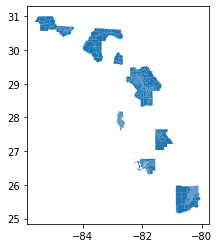

In [130]:
census_block_precincts.plot()

In [138]:
ALA_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/ALA/ALA20121106v6_PctMap/ALA20121106v6_PctMap.shp")
BAK_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/BAK/BAK20121106v6_PctMap/BAK20121106v6_PctMap.shp")
BAY_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/BAK/BAK20121106v6_PctMap/BAK20121106v6_PctMap.shp")
BRA_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/BRA/BRA20121106v6_PctMap/BRA20121106v5_PctMap.shp")
BRE_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/BRE/Post RD Precincts/Precincts_2016.shp")
BRO_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/BRO/PRECINCTS/PRECINCTS_region.shp")
CAL_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/CAL/CAL20121106v6_PctMap/CAL20121106v6_PctMap.shp")
CHA_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/CHA/CHA20121106v6_PctMap/CHA20121106v5_PctMap.shp")
CIT_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/CIT/CIT20170531_PctMap/PRECINCT05312017.shp")
CLA_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/CLA/CLA20160503_PctMapcc84b5a6-3ade-4dd9-acd8-4c8157bcd343/CLA20160503_PctMap.shp")
CLA_pct = CLA_pct.dissolve(by="PRECINCT")
CLA_pct.reset_index(inplace=True)
CLL_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/CLL/Shape Files/PRECINCT12021.shp")
CLM_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/CLM/CLM20121106v6_PctMap/CLM20121106v6_PctMap.shp")
DES_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/DES/DES20121106v6_PctMap/DES20121106v5_PctMap.shp")
DIX_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/DIX/DIX20121106v6_PctMap/DIX20121106v6_PctMap.shp")
DUV_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/DUV/DUV20120615_PctMap_region38f2bdfc-7be4-466e-ab20-98b2ad332567/DUV20120615_PctMap_region.shp")
ESC_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/ESC/Precinct_Map_2018/PRECINCT_MAP_022018.shp")
FLA_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/FLA/FLA20121106v6_PctMap/FLA20121106v6_PctMap.shp")
FRA_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/FRA/FRA20121106v6_PctMap/FRA20121106v6_PctMap.shp")
GLA_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/GLA/GLA20121106v6_PctMap/GLA20121106v6_PctMap.shp")
GUL_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/GUL/GUL20121106v6_PctMap/GUL20121106v6_PctMap.shp")
HAR_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/HAR/HAR20121106v6_PctMap/HAR20121106v6_PctMap.shp")
HEN_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/HEN/HEN20121106v6_PctMaped1303a5-dc65-41db-ac5f-a2bc3e07721a/HEN20121106v5_PctMap.shp")
HER_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/HER/HER20121106v6_PctMap/HER20121106v6_PctMap.shp")
HIL_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/HIL/HIL20170620_PctMap9febfa30-eb46-4b2b-98d8-efb4bf232874/PctMap.shp")
HOL_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/HOL/HOL20121106v6_PctMap/HOL20121106v6_PctMap.shp")
IND_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/IND/IND20121106v6_PctMap/IND20121106v6_PctMap.shp")
JEF_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/JEF/JEF20121106v6_PctMap/JEF20121106v6_PctMap.shp")
LAF_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/LAF/LAF20121106v6_PctMap/LAF20121106v6_PctMap.shp")
LEO_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/LEO/LEO20160608_PctMapf23ef83b-963f-4d2a-a377-6832ef66b253/LEO02160608_PctMap.shp")
LEV_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/LEV/LEV20121106v6_PctMap/LEV20121106v6_PctMap.shp")
LIB_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/LIB/LIB20121106v6_PctMap/LIB20121106v5_PctMap.shp")
MAN_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/MAN/MAN20121106v6_PctMap/MAN20121106v6_PctMap.shp")
MON_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/MON/MON20121106v6_PctMap/MON20121106v6_PctMap.shp")
MRT_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/MRT/MRT20121106v6_PctMap/MRT20121106v6_PctMap.shp")
NAS_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/NAS/NAS20121106v6_PctMap/NAS20121106v5_PctMap.shp")
OKA_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/OKA/OKA20121106_PCTv6da58ba66-dc93-4a57-b652-54e0178dd8c0/OKA20121106v6_PctMap/OKA20121106v5_PctMap.shp")
OKE_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/OKE/OKE20120628_PctMap515d73e7-c7f9-43ac-83df-e27de5e49af7/2012 Precincts.shp")
ORA_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/ORA/ORA20160506_PctMapc9f3a643-0427-4f76-83e6-015be0bd518c/ORA20160506_PctMap_region.shp")
OSC_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/OSC/OSC20160614_PctMapee50a15b-49e5-40e9-b975-fc25e040399a/2016_06 Osceola Precincts.shp")
PAL_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/PAL/SHAPEFILES 2012_region/SHAPEFILES 2012_region.shp")
PAS_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/PAS/ESRI Shapefiles/Pasco.shp")
POL_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/POL/POL20160511_PctMapbb417d62-028d-4b78-adbf-344f474213b2/2016 Polk Precincts.shp")
PUT_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/PUT/PUT20160614PctMap98164384-dc27-48c1-8ae9-dfa69c6afdc0/PUT20160614PctMap.shp")
SAN_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/SAN/SAN20121106v6_PctMap/SAN20121106v6_PctMap.shp")
SAR_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/SAR/SAR20140109v6_PctMapf831e47b-44f3-4954-a8e8-052b3a084322/SarasotaCounty_Pcts_051613_region.shp")
SEM_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/SEM/SEM20121106v6_PctMap/SEM20121106v6_PctMap.shp")
STJ_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/STJ/STJ20121106v6_PctMap7902e8be-3a36-4698-9e89-0b6a34bc20c1/STJ20121106v6_PctMap.shp")
STL_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/STL/STL20121106v6_PctMap/STL20121106v6_PctMap.shp")
SUW_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/SUW/SUW20121106v6_PctMap/SUW20121106v6_PctMap.shp")
UNI_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/UNI/UNI20121106v6_PctMap/UNI20121106v6_PctMap.shp")
VOL_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/VOL/VOL20160721_PctMap05578db2-b193-44b2-988d-0ba4f6c63ead/VOL20160721_PctMap.shp")
WAK_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/WAK/WAK20121106v6_PctMap/WAK20121106v6_PctMap.shp")
WAL_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/WAL/WAL20121106v6_PctMap/WAL20121106v6_PctMap.shp")
WAS_pct=gp.read_file("./raw-from-source/Records_Request/Precinct and Polling Place Files - 2012-present - last checked 7-23-2020/WAS/WAS20121106v6_PctMap/WAS20121106v6_PctMap.shp")
WAS_pct=WAS_pct.dissolve(by="pct_std")
BRE_pct=BRE_pct.dissolve(by="EPrecinct")
OSC_pct=OSC_pct.dissolve(by="PCT2014")
WAS_pct.reset_index(inplace=True)
BRE_pct.reset_index(inplace=True)
OSC_pct.reset_index(inplace=True)

  Precinct  pct_std                                           geometry
0        1  WAS0001  POLYGON ((-85.75195 30.78339, -85.75198 30.775...
1       10  WAS0010  POLYGON ((-85.57119 30.74723, -85.57122 30.746...
2      10A  WAS0010  POLYGON ((-85.61171 30.75479, -85.61021 30.754...
3       11  WAS0011  POLYGON ((-85.81292 30.54333, -85.81192 30.542...
4       12  WAS0012  POLYGON ((-85.62947 30.52597, -85.62905 30.525...


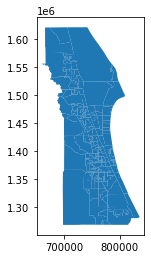

In [141]:
BRE_pct.plot()

In [147]:
ALA_pct['new_county']='ALA'
BAK_pct['new_county']='BAK'
BAY_pct['new_county']='BAY'
BRA_pct['new_county']='BRA'
BRE_pct['new_county']='BRE'
BRO_pct['new_county']='BRO'
CAL_pct['new_county']='CAL'
CHA_pct['new_county']='CHA'
CIT_pct['new_county']='CIT'
CLA_pct['new_county']='CLA'
CLL_pct['new_county']='CLL'
CLM_pct['new_county']='CLM'
DES_pct['new_county']='DES'
DIX_pct['new_county']='DIX'
DUV_pct['new_county']='DUV'
ESC_pct['new_county']='ESC'
FLA_pct['new_county']='FLA'
FRA_pct['new_county']='FRA'
GLA_pct['new_county']='GLA'
GUL_pct['new_county']='GUL'
HAR_pct['new_county']='HAR'
HEN_pct['new_county']='HEN'
HER_pct['new_county']='HER'
HIL_pct['new_county']='HIL'
HOL_pct['new_county']='HOL'
IND_pct['new_county']='IND'
JEF_pct['new_county']='JEF'
LAF_pct['new_county']='LAF'
LEO_pct['new_county']='LEO'
LEV_pct['new_county']='LEV'
LIB_pct['new_county']='LIB'
MAN_pct['new_county']='MAN'
MON_pct['new_county']='MON'
MRT_pct['new_county']='MRT'
NAS_pct['new_county']='NAS'
OKA_pct['new_county']='OKA'
OKE_pct['new_county']='OKE'
ORA_pct['new_county']='ORA'
OSC_pct['new_county']='OSC'
PAL_pct['new_county']='PAL'
PAS_pct['new_county']='PAS'
POL_pct['new_county']='POL'
PUT_pct['new_county']='PUT'
SAN_pct['new_county']='SAN'
SAR_pct['new_county']='SAR'
SEM_pct['new_county']='SEM'
STJ_pct['new_county']='STJ'
STL_pct['new_county']='STL'
SUW_pct['new_county']='SUW'
UNI_pct['new_county']='UNI'
VOL_pct['new_county']='VOL'
WAK_pct['new_county']='WAK'
WAL_pct['new_county']='WAL'
WAS_pct['new_county']='WAS'

In [148]:
fl_2016_shapefiles = [ALA_pct,BAK_pct,BAY_pct,BRA_pct,BRE_pct,BRO_pct,CAL_pct,CHA_pct,CIT_pct,CLA_pct,CLL_pct,CLM_pct,
DES_pct,DIX_pct,DUV_pct,ESC_pct,FLA_pct,FRA_pct,GLA_pct,GUL_pct,HAR_pct,
HEN_pct,HER_pct,HIL_pct,HOL_pct,IND_pct,JEF_pct,LAF_pct,LEO_pct,LEV_pct,LIB_pct,MAN_pct,MON_pct,MRT_pct,NAS_pct,
OKA_pct,OKE_pct,ORA_pct,OSC_pct,PAL_pct,PAS_pct,POL_pct,PUT_pct,SAN_pct,SAR_pct,
SEM_pct,STJ_pct,STL_pct,SUW_pct,UNI_pct,VOL_pct,WAK_pct,WAL_pct,WAS_pct]

In [155]:
print(ALA_pct.columns)


Index(['COUNTY', 'PRECINCT', 'CTY_PCT', 'COUNT_FID', 'SUM_AREA_M', 'PCT_STD',
       'GEOMETRY', 'new_county'],
      dtype='object')


In [153]:
for i in fl_2016_shapefiles:
    print(i.columns)

Index(['COUNTY', 'PRECINCT', 'CTY_PCT', 'COUNT_FID', 'SUM_AREA_M', 'PCT_STD',
       'GEOMETRY', 'new_county'],
      dtype='object')
Index(['County', 'Precinct', 'cty_pct', 'COUNT_FID', 'SUM_area_m', 'pct_std',
       'geometry', 'new_county'],
      dtype='object')
Index(['County', 'Precinct', 'cty_pct', 'COUNT_FID', 'SUM_area_m', 'pct_std',
       'geometry', 'new_county'],
      dtype='object')
Index(['County', 'Precinct', 'cty_pct', 'COUNT_FID', 'SUM_area_m', 'pct_std',
       'geometry', 'new_county'],
      dtype='object')
Index(['EPrecinct', 'geometry', 'PCT', 'CC', 'CDS', 'CNG', 'CTY', 'HSE', 'PA',
       'REC', 'SB', 'SD', 'SEN', 'SID', 'PctsAreas', 'EPct_Area', 'WRD',
       'Shape_Leng', 'Shape_Area', 'new_county'],
      dtype='object')
Index(['PRECINCT', 'geometry', 'new_county'], dtype='object')
Index(['County', 'Precinct', 'cty_pct', 'COUNT_FID', 'SUM_area_m', 'pct_std',
       'geometry', 'new_county'],
      dtype='object')
Index(['County', 'Precinct', 'cty_pct', 'COU

In [154]:
no_pct_std = []
filtered_list = []
for i in fl_2016_shapefiles:
    i.columns[~geometry] = i.columns.str.upper()
    if "PCT_STD" not in (i.columns):
        print(i.head(2))
        print("")
        print("")
        print("")
        no_pct_std.append(i)
    else:
        i_new = i[["PCT_STD","GEOMETRY","NEW_COUNTY"]]
        i_new["PCT_STD"]=i_new["PCT_STD"].str[3:]
        filtered_list.append(i_new)

filtered_list_two = []
remaining_precincts =[]
for i in no_pct_std:
    if "PRECINCT" in (i.columns):
        print(i.head(2))
        i_new = i[["PRECINCT","GEOMETRY","NEW_COUNTY"]]
        filtered_list_two.append(i_new)
    else:
        remaining_precincts.append(i)

final_pcts = []
for i in remaining_precincts:
    print(i["NEW_COUNTY"].unique())
    print(i.columns)
    print(i.head(1))
    print("")
    print("")
    if (i["NEW_COUNTY"].unique() == ["BRE"]):
        i_new = i[['EPRECINCT','GEOMETRY','NEW_COUNTY']]
        final_pcts.append(i_new)
    if (i["NEW_COUNTY"].unique() == ['OKE']):
        i_new = i[['DISTRICT','GEOMETRY','NEW_COUNTY']]
        final_pcts.append(i_new)
    if (i["NEW_COUNTY"].unique() == ['ORA']):
        i_new = i[['PRECMAY201','GEOMETRY','NEW_COUNTY']]
        final_pcts.append(i_new)
    if (i["NEW_COUNTY"].unique() == ['OSC']):
        i_new = i[['PCT2014','GEOMETRY','NEW_COUNTY']]
        final_pcts.append(i_new)
    if (i["NEW_COUNTY"].unique() == ['POL']):
        i_new = i[['DISTRICT','GEOMETRY','NEW_COUNTY']]
        final_pcts.append(i_new)
    if (i["NEW_COUNTY"].unique() == ['PUT']):
        i_new = i[['PRECINCTID','GEOMETRY','NEW_COUNTY']]
        final_pcts.append(i_new)

NameError: name 'geometry' is not defined

In [114]:
source_shapes_list = filtered_list + filtered_list_two + final_pcts
#print(len(source_shapes_list))
for i in source_shapes_list:
    i.columns = ["PRECINCT","GEOMETRY","COUNTY"]

source_shapes = pd.concat(source_shapes_list)



In [116]:
print(census_block_precincts.head())

  PRECINCT                                           GEOMETRY COUNTY
0        1  POLYGON ((945744.182 591089.188, 945342.040 59...    DAD
1       10  POLYGON ((940324.977 560105.262, 939570.575 56...    DAD
2      100  POLYGON ((869626.587 535125.722, 869701.596 53...    DAD
3      101  POLYGON ((931284.779 593155.952, 931030.853 59...    DAD
4      102  POLYGON ((936442.578 592005.727, 936413.569 59...    DAD


In [115]:
census_block_precincts=census_block_precincts[["Precinct","geometry","County"]]
census_block_precincts.columns=["PRECINCT","GEOMETRY","COUNTY"]

KeyError: "None of [Index(['Precinct', 'geometry', 'County'], dtype='object')] are in the [columns]"

In [117]:
both_sources=pd.concat([census_block_precincts,source_shapes])
both_sources.columns=["precinct","geometry","county"]
precinct_shapefiles = gp.GeoDataFrame(data=both_sources)
#precinct_shapefiles = precinct_shapefiles.to_crs(vest_fl_16.crs)
print(precinct_shapefiles.head())
print(precinct_shapefiles.columns)
print(len(precinct_shapefiles["county"].unique()))

  precinct                                           geometry county
0        1  POLYGON ((945744.182 591089.188, 945342.040 59...    DAD
1       10  POLYGON ((940324.977 560105.262, 939570.575 56...    DAD
2      100  POLYGON ((869626.587 535125.722, 869701.596 53...    DAD
3      101  POLYGON ((931284.779 593155.952, 931030.853 59...    DAD
4      102  POLYGON ((936442.578 592005.727, 936413.569 59...    DAD
Index(['precinct', 'geometry', 'county'], dtype='object')
67


In [118]:
print(len(vest_fl_16["county"].unique()))

67


In [120]:
precinct_shapefiles.crs

<Projected CRS: EPSG:2236>
Name: NAD83 / Florida East (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Florida - SPCS - E
- bounds: (-82.33, 24.41, -79.97, 30.83)
Coordinate Operation:
- name: SPCS83 Florida East zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [88]:
precinct_shapefiles.reset_index(drop=True,inplace=True)
print(precinct_shapefiles.head())
precinct_shapefiles.crs
#precinct_shapefiles.to_csv("./source_geoms.csv")

  precinct                                           geometry county
0        1  POLYGON ((-80.11869 25.95714, -80.11992 25.957...    DAD
1       10  POLYGON ((-80.13581 25.87200, -80.13810 25.871...    DAD
2      100  POLYGON ((-80.35118 25.80440, -80.35095 25.804...    DAD
3      101  POLYGON ((-80.15749 25.96307, -80.15965 25.963...    DAD
4      102  POLYGON ((-80.14698 25.95983, -80.14705 25.961...    DAD


<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
precinct_shapefiles["precinct"]=precinct_shapefiles["precinct"].astype(str)
precinct_shapefiles["precinct"]=precinct_shapefiles["precinct"].str.zfill(5)
precinct_shapefiles["countypct"]=precinct_shapefiles["COUNTY"]+precinct_shapefiles["PRECINCT"]

In [ ]:
print(precinct_shapefiles.columns)

In [ ]:
precinct_shapefiles.columns=['precinct','geometry','county','countypct']

In [ ]:
print(precinct_shapefiles.columns)

In [ ]:
precinct_shapefiles[precinct_shapefiles["county"]=="OKE"]

In [ ]:
shapes_and_elections = pd.merge(precinct_shapefiles,pivoted_2016,on="countypct",how="outer",indicator=True)
print(shapes_and_elections["_merge"].value_counts())
shapes_and_elections[shapes_and_elections["_merge"]=="left_only"].to_csv("./shapefile_only.csv")
shapes_and_elections[shapes_and_elections["_merge"]=="right_only"].to_csv("./elections_only.csv")
both_shapes_and_elections = shapes_and_elections[shapes_and_elections["_merge"]=="both"]

In [ ]:
print(vest_fl_16.crs)
print(both_shapes_and_elections.crs)

In [ ]:
final_validation = pd.merge(both_shapes_and_elections,vest_fl_16,on="countypct",how="outer",indicator="final_ind")
print(final_validation["final_ind"].value_counts())

In [ ]:
print(final_validation.is_valid)

In [ ]:
print(final_validation.shape)
source_geoms = gp.GeoDataFrame(final_validation[final_validation["final_ind"]=="both"],geometry="geometry_x")
vest_geoms = gp.GeoDataFrame(final_validation[final_validation["final_ind"]=="both"],geometry="geometry_y")
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=2)

In [ ]:
print(vals.value_counts())

In [ ]:
#Show a random difference
test = final_validation[~vals].sample(axis=0,n=1).index[0]
display(final_validation.iloc[test]["geometry_x"])
display(final_validation.iloc[test]["geometry_y"])

test = final_validation[~vals].sample(axis=0,n=1).index[0]
display(final_validation.iloc[test]["geometry_x"])
display(final_validation.iloc[test]["geometry_y"])

In [ ]:
print(source_geoms.is_valid.value_counts())
print(vest_fl_16.is_valid.value_counts())

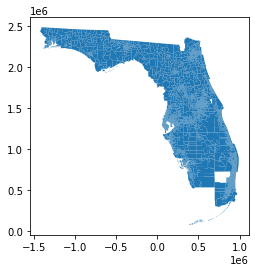

In [121]:
vest_fl_16.plot()